In [1]:
#Linear Regression

In [2]:
#Import dependancies
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#Read in csv file that has gone through the ETL process
ml_movies=pd.read_csv("Resource/IMDB_cora.csv")
ml_movies.head()

,Unnamed: 0,country,language,world_gross_income
0,79,Russia,Russian,144968.0
1,165,Germany,German,8811.0
2,222,USA,English,772155.0
3,245,USA,English,9183673.0
4,251,USA,English,26916.0


In [4]:
#Remove the extra column "Unnamed: 0"
ml_movies= ml_movies.drop("Unnamed: 0", axis=1)
ml_movies.head()

,country,language,world_gross_income
0,Russia,Russian,144968.0
1,Germany,German,8811.0
2,USA,English,772155.0
3,USA,English,9183673.0
4,USA,English,26916.0


In [5]:
#Create function to replace language labels with English or non-English
English = ["English","english","English,None"]
def clean(response):
    if response.lower().rstrip() in English:
        return "English"
    else:
        return "NonEnglish"
ml_movies["language"] = ml_movies["language"].apply(lambda x: clean(x))
print(ml_movies)

               country    language  world_gross_income
0               Russia  NonEnglish            144968.0
1              Germany  NonEnglish              8811.0
2                  USA     English            772155.0
3                  USA     English           9183673.0
4                  USA     English             26916.0
...                ...         ...                 ...
30851            India  NonEnglish              4791.0
30852  France, Belgium  NonEnglish           3507171.0
30853      Netherlands  NonEnglish           7299062.0
30854           Turkey  NonEnglish              2833.0
30855            Spain  NonEnglish             59794.0

[30856 rows x 3 columns]


In [6]:
#Convert pandas array to numpy array
ml_languages=ml_movies["language"]
ml_languages=np.array(ml_languages)
ml_languages

array(['NonEnglish', 'NonEnglish', 'English', ..., 'NonEnglish',
       'NonEnglish', 'NonEnglish'], dtype=object)

In [7]:
#Set up definition for X and y and reshape the data
X=ml_languages
y=ml_movies["world_gross_income"].values.reshape(-1,1)
print(X,y)

['NonEnglish' 'NonEnglish' 'English' ... 'NonEnglish' 'NonEnglish'
 'NonEnglish'] [[1.449680e+05]
 [8.811000e+03]
 [7.721550e+05]
 ...
 [7.299062e+06]
 [2.833000e+03]
 [5.979400e+04]]


In [8]:
# Apply label encoding to categorize the language as being English or non-English
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data = X.copy()
label_encoder.fit(data)
label_encoder.classes_

array(['English', 'NonEnglish'], dtype=object)

In [9]:
#Transform the data using label encoding
label_encoder.transform(data)
X = pd.get_dummies(X)

In [10]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.head()

,English,NonEnglish
20576,1,0
21744,0,1
19394,1,0
8329,1,0
29020,0,1


In [11]:
#Create a StandardScaler model
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [12]:
#Transform training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

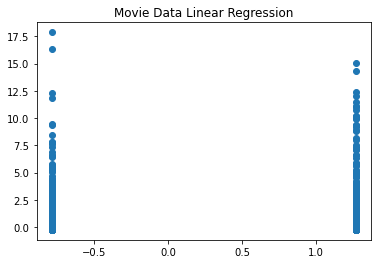

In [14]:
#Create Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_test_scaled, y_test_scaled)
plt.scatter(X_test_scaled[:,0],y_test_scaled)
plt.title("Movie Data Linear Regression")
plt.savefig("Images/linear_cora.jpg")
plt.show()

In [15]:
#Calculate R2
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"R2: {r2}")

R2: 0.019902891913093024


In [ ]:
#Conclusion: The low value of R2 demonstrate that the data does not fit this regression model very well. Another model should be attempted. 